In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import shutil
# Define paths to the datasets within the zipped folder
dataset_path = '/kaggle/input/teethdata/Teeth DataSet/Teeth_Dataset'
train_dir = os.path.join(dataset_path, 'Training')
valid_dir = os.path.join(dataset_path, 'Validation')
test_dir = os.path.join(dataset_path, 'Testing')

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Image resizing parameters
img_height, img_width = 256, 256

# Data generator for training (no augmentation, just rescaling)
train_datagen = ImageDataGenerator(
    rescale=1./255
)

# Data generator for validation and testing (no augmentation, just rescaling)
test_datagen = ImageDataGenerator(
    rescale=1./255
)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

validation_generator = test_datagen.flow_from_directory(
    valid_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=32,
    class_mode='categorical'
)


Found 3087 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.
Found 1028 images belonging to 7 classes.


In [3]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
num_classes=7
# Load the VGG16 model, excluding the top layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the base model layers
for layer in base_model.layers:
    layer.trainable = False

# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=x)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Display the model architecture
model.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 256, 256, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         7,175 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15,247,175 (58.16 MB)

 Trainable params: 532,487 (2.03 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [4]:
import tensorflow as tf
# Unfreeze the last few layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True

# Recompile the model with a lower learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# Define the ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.0001)

# Train model
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=25,
    callbacks=[reduce_lr]
)

Epoch 1/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 26s 258ms/step - accuracy: 0.1714 - loss: 1.9859 - val_accuracy: 0.4144 - val_loss: 1.7081 - learning_rate: 1.0000e-05
Epoch 2/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.3493 - loss: 1.6956 - val_accuracy: 0.5049 - val_loss: 1.4037 - learning_rate: 1.0000e-05
Epoch 3/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.4626 - loss: 1.3953 - val_accuracy: 0.5720 - val_loss: 1.2284 - learning_rate: 1.0000e-05
Epoch 4/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.5475 - loss: 1.2429 - val_accuracy: 0.6041 - val_loss: 1.0957 - learning_rate: 1.0000e-05
Epoch 5/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.5946 - loss: 1.0981 - val_accuracy: 0.6663 - val_loss: 0.9697 - learning_rate: 1.0000e-05
Epoch 6/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - accuracy: 0.6432 - loss: 0.9645 - val_accuracy: 0.7043 - val_loss: 0.8985 - learning_rate: 1.0000e-05
Epoch 7/25
97/97 ━━━━━━━━━━━━━━━━━━━━ 12s 121ms/step - acc

In [7]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // test_generator.batch_size)
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test Loss: {test_loss:.4f}")

32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.9476 - loss: 0.1583
Test Accuracy: 0.9551
Test Loss: 0.1457


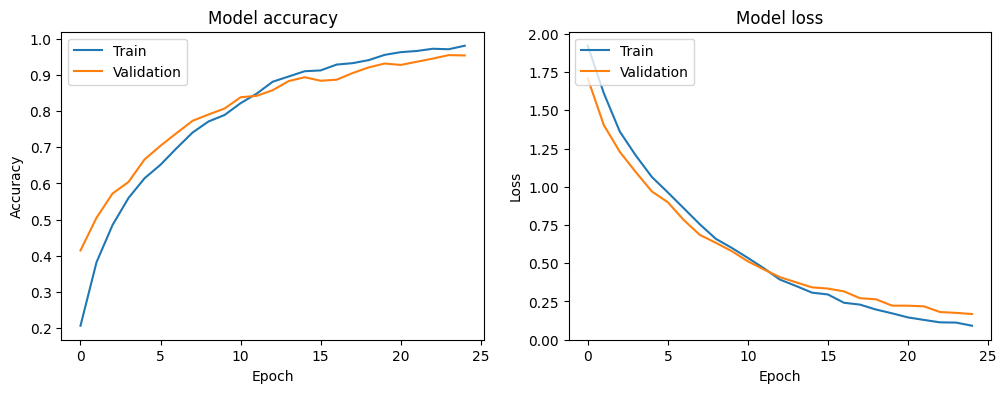

In [8]:
import matplotlib.pyplot as plt

def plot_history(history):
    plt.figure(figsize=(12, 4))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Validation'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.show()

# Plot training history
plot_history(history)


In [9]:
class_labels = list(train_generator.class_indices.keys())

# Print the class labels to verify
print(f"Class labels: {class_labels}")


Class labels: ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']


In [10]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing import image

# Paths to the images 
img_path1 = '/kaggle/input/imageunknown/imageunknowng.jpg'
img_path2 = '/kaggle/input/unknown3/unknownimage3.jpeg'

# Load and preprocess the first image
img1 = image.load_img(img_path1, target_size=(img_height, img_width))
img_array1 = image.img_to_array(img1)
img_array1 = np.expand_dims(img_array1, axis=0)  # Expand dims to match the input shape
img_array1 = img_array1 / 255.0  # Normalize the image (same as during training)

# Load and preprocess the second image
img2 = image.load_img(img_path2, target_size=(img_height, img_width))
img_array2 = image.img_to_array(img2)
img_array2 = np.expand_dims(img_array2, axis=0)  # Expand dims to match the input shape
img_array2 = img_array2 / 255.0  # Normalize the image (same as during training)


img_batch = np.vstack([img_array1, img_array2])

# Make the prediction
predictions = model.predict(img_batch)

# Get the indices of the classes with the highest probability
predicted_class1 = np.argmax(predictions[0])
predicted_class2 = np.argmax(predictions[1])

# Print the predicted classes
print(f"Predicted class for image 1: {class_labels[predicted_class1]}")
print(f"Predicted class for image 2: {class_labels[predicted_class2]}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class for image 1: Gum
Predicted class for image 2: CoS


The two images used to test the model's prediction are from outside the dataset and the model predicted them successfully

In [11]:
model.save('path_to_your_model.h5')

In [12]:
!pip freeze > requirements.txt

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()
